## パッケージ

In [8]:
import matplotlib.pyplot as plt
from matplotlib import ticker
import seaborn as sns
%matplotlib inline 

In [9]:
import os, cv2, random
import numpy as np
import pandas as pd

In [10]:
import matplotlib.pyplot as plt
from matplotlib import ticker
import seaborn as sns

In [11]:
%matplotlib inline 

## トレーニング

In [12]:
TRAIN_DIR = 'F:/Dateset/kerasstudy/dogcats/train/'
TEST_DIR = 'F:/Dateset/kerasstudy/dogcats/test/'

In [13]:
# りサイズ用の定義
ROWS = 64
COLS = 64
CHANNELS = 3


In [14]:
train_images = [TRAIN_DIR+i for i in os.listdir(TRAIN_DIR)] # use this for full dataset


In [15]:
len(train_images)

25000

In [16]:
train_images[1000]

'F:/Dateset/kerasstudy/dogcats/train/cat.10898.jpg'

## リストの内包表記

In [17]:
train_dogs =   [TRAIN_DIR+i for i in os.listdir(TRAIN_DIR) if 'dog' in i]
train_cats =   [TRAIN_DIR+i for i in os.listdir(TRAIN_DIR) if 'cat' in i]

In [18]:
len(train_dogs), len(train_cats)

(12500, 12500)

In [19]:
test_images =  [TEST_DIR+i for i in os.listdir(TEST_DIR)]

In [20]:
len(test_images)

12500

## リストのスライス処理

In [21]:
train_images = train_dogs[:1000] + train_cats[:1000]

In [22]:
len(train_images)

2000

In [23]:
random.shuffle(train_images)

In [24]:
# 先頭25枚のデータを取り出す
test_images =  test_images[:25]

In [25]:
len(test_images)

25

## 画像ファイルを多次元配列に変換する

In [26]:
def read_image(file_path):
    # 画像ファイrをRGBで読み込む
    img = cv2.imread(file_path, cv2.IMREAD_COLOR) #cv2.IMREAD_GRAYSCALE
    # りサイズして処理をする
    return cv2.resize(img, (ROWS, COLS), interpolation=cv2.INTER_CUBIC)

In [27]:
# 画像ファイル群をnumpyの多次元配列に変換する関数
def prep_data(images):
    count = len(images)
    # numpy多次元配列(ndarray)として初期化する, channelsはrgb３色のこと
    data = np.ndarray((count, CHANNELS, ROWS, COLS), dtype=np.uint8)
    # 画像を一個ずつ取り出し、i という番号を自動的に振る付ける
    for i, image_file in enumerate(images):
        image = read_image(image_file) #リサイズ後の画像配列の値を引き渡す
        data[i] = image.T
        if i%250 == 0: print('Processed {} of {}'.format(i, count)) #250個終わるごとにカウントする
        
    return data

In [28]:
# 画像データを数字のデータとして格納する
train = prep_data(train_images)
test = prep_data(test_images)

Processed 0 of 2000
Processed 250 of 2000
Processed 500 of 2000
Processed 750 of 2000
Processed 1000 of 2000
Processed 1250 of 2000
Processed 1500 of 2000
Processed 1750 of 2000
Processed 0 of 25


In [29]:
train_cats[0]

'F:/Dateset/kerasstudy/dogcats/train/cat.0.jpg'

In [30]:
train.shape, test.shape

((2000, 3, 64, 64), (25, 3, 64, 64))

## ファイル名から分類ラベル(ドッグ/キャット)を貼る

In [31]:
labels = []
for i in train_images:
    if 'dog.' in i:
        labels.append(1)
    else:
        labels.append(0)

In [32]:
labels[0:10]

[1, 0, 0, 1, 0, 0, 0, 1, 0, 0]

In [33]:
train_images[0:10] #一致の確認

['F:/Dateset/kerasstudy/dogcats/train/dog.10229.jpg',
 'F:/Dateset/kerasstudy/dogcats/train/cat.10559.jpg',
 'F:/Dateset/kerasstudy/dogcats/train/cat.10768.jpg',
 'F:/Dateset/kerasstudy/dogcats/train/dog.10480.jpg',
 'F:/Dateset/kerasstudy/dogcats/train/cat.10341.jpg',
 'F:/Dateset/kerasstudy/dogcats/train/cat.10367.jpg',
 'F:/Dateset/kerasstudy/dogcats/train/cat.10432.jpg',
 'F:/Dateset/kerasstudy/dogcats/train/dog.1083.jpg',
 'F:/Dateset/kerasstudy/dogcats/train/cat.10667.jpg',
 'F:/Dateset/kerasstudy/dogcats/train/cat.10535.jpg']

C:\Users\yuji\anaconda3\envs\tf110cpu\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Cats and Dogs')

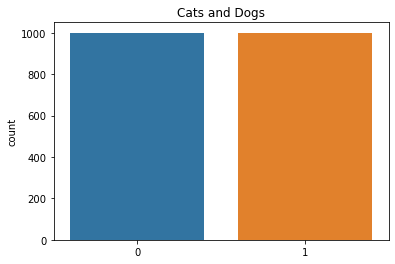

In [34]:
sns.countplot(labels)
plt.title('Cats and Dogs')

## 番号を指定して、指定した番号の画像を表示する

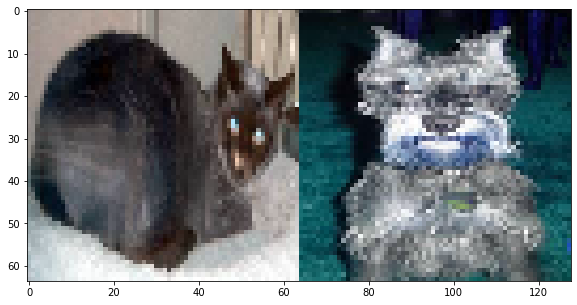

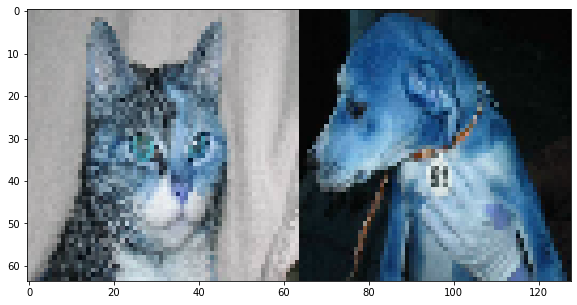

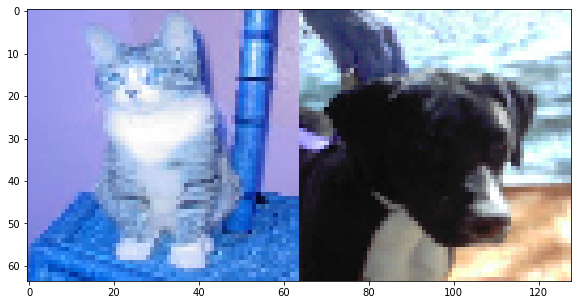

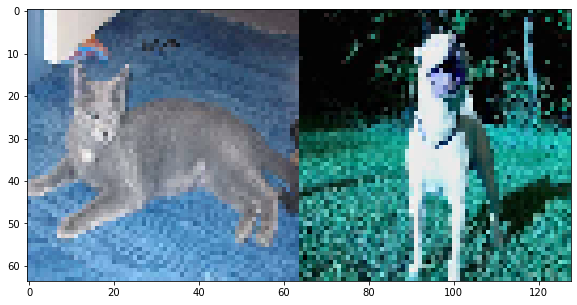

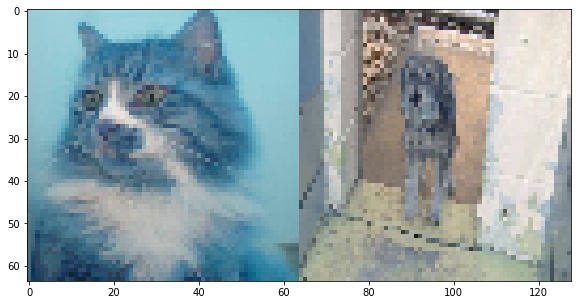

In [35]:
def show_cats_and_dogs(idx):
    cat = read_image(train_cats[idx])
    dog = read_image(train_dogs[idx])
    pair = np.concatenate((cat, dog), axis=1) # 配列を一行に連結する
    plt.figure(figsize=(10,5))
    plt.imshow(pair) # 数値→画像化
    plt.show()
    
for idx in range(10,15):
    show_cats_and_dogs(idx)

## 犬猫の平均画像を取得する

In [36]:
# trainから一つずつデータを取り出し番号としてiを振る。ドッグに一つ情報を入れて、色情報の平均をとる
dog_avg = np.array([dog[0].T for i, dog in enumerate(train) if labels [i] ==1]).mean(axis=0)

Text(0.5, 1.0, 'Your Average Dog')

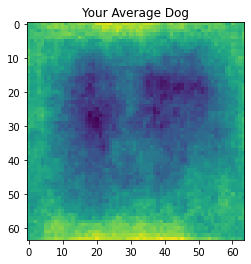

In [37]:
plt.imshow(dog_avg)
plt.title('Your Average Dog')

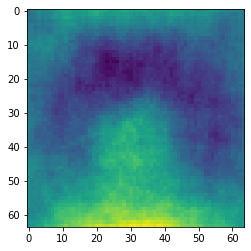

In [38]:
cat_avg = np.array([cat[0].T for i, cat in enumerate(train) if labels [i] ==0]).mean(axis=0)
plt.imshow(cat_avg)

## CatdogNet-16を定義する

In [2]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [4]:
from keras.models import Sequential
from keras.layers import Input, Dropout, Flatten, Convolution2D, MaxPooling2D, Dense, Activation
from keras.optimizers import RMSprop
from keras.callbacks import ModelCheckpoint, Callback, EarlyStopping
from keras.utils import np_utils

AttributeError: module 'tensorflow.python.util.dispatch' has no attribute 'add_fallback_dispatch_list'

In [3]:
optimizer = RMSprop(lr=1e-4)
objective = 'binary_crossentropy'


NameError: name 'RMSprop' is not defined

In [ ]:


def catdog():
    
    model = Sequential()

    model.add(Convolution2D(32, 3, 3, border_mode='same', input_shape=(3, ROWS, COLS), activation='relu'))
    model.add(Convolution2D(32, 3, 3, border_mode='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Convolution2D(64, 3, 3, border_mode='same', activation='relu'))
    model.add(Convolution2D(64, 3, 3, border_mode='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    model.add(Convolution2D(128, 3, 3, border_mode='same', activation='relu'))
    model.add(Convolution2D(128, 3, 3, border_mode='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    model.add(Convolution2D(256, 3, 3, border_mode='same', activation='relu'))
    model.add(Convolution2D(256, 3, 3, border_mode='same', activation='relu'))
#     model.add(Convolution2D(256, 3, 3, border_mode='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

#     model.add(Convolution2D(256, 3, 3, border_mode='same', activation='relu'))
#     model.add(Convolution2D(256, 3, 3, border_mode='same', activation='relu'))
#     model.add(Convolution2D(256, 3, 3, border_mode='same', activation='relu'))
#     model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.5))
    
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.5))

    model.add(Dense(1))
    model.add(Activation('sigmoid'))

    model.compile(loss=objective, optimizer=optimizer, metrics=['accuracy'])
    return model


model = catdog()

In [5]:
## トレーニングを実行しよう
nb_epoch = 10
batch_size = 16

## Callback for loss logging per epoch
class LossHistory(Callback):
    def on_train_begin(self, logs={}):
        self.losses = []
        self.val_losses = []
        
    def on_epoch_end(self, batch, logs={}):
        self.losses.append(logs.get('loss'))
        self.val_losses.append(logs.get('val_loss'))

early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, mode='auto')        
        
def run_catdog():
    
    history = LossHistory()
    model.fit(train, labels, batch_size=batch_size, nb_epoch=nb_epoch,
              validation_split=0.25, verbose=0, shuffle=True, callbacks=[history, early_stopping])
    

    predictions = model.predict(test, verbose=0)
    return predictions, history

predictions, history = run_catdog()

NameError: name 'Callback' is not defined

In [6]:
loss = history.losses
val_loss = history.val_losses

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('VGG-16 Loss Trend')
plt.plot(loss, 'blue', label='Training Loss')
plt.plot(val_loss, 'green', label='Validation Loss')
plt.xticks(range(0,nb_epoch)[0::2])
plt.legend()
plt.show()

NameError: name 'history' is not defined

## 推定結果を可視化する

In [ ]:
for i in range(0,10):
    if predictions[i, 0] >= 0.5: 
        print('I am {:.2%} sure this is a Dog'.format(predictions[i][0]))
    else: 
        print('I am {:.2%} sure this is a Cat'.format(1-predictions[i][0]))
        
    plt.imshow(test[i].T)
    plt.show()